# Generate example platemap figure to represent all plates

Note: Each of the 7 plates in this targeted fibrosis drug screen have the same layout (e.g., placement of treatments and cell types) but different compound treatments. We can create one representative platemap labelling treatment and cell type for all plates.

## Import libraries

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(platetools))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘platetools’ was built under R version 4.2.3”


## Set paths

In [2]:
# directory for fig to be outputted
output_dir <- file.path("./platemap_fig")

# Create the output directory if it doesn't exist
if (!dir.exists(output_dir)) {
  dir.create(output_dir, recursive = TRUE)
}

# path to one platemap file since all have same layout but different compounds
platemap_file1 <- file.path("./target_screen_plate1.csv")
platemap_file7 <- file.path("./target_screen_plate7.csv") 

# Directory for example platemap figures
output_fig1_6 <- file.path(output_dir, "example_platemap1_6.png")
output_fig7 <- file.path(output_dir, "example_platemap7.png")

## Load in platemap file

In [3]:
platemap_df1 <- readr::read_csv(
    platemap_file1,
    col_types = readr::cols(.default = "c")
)

# Add new column for "condition" to plot on platemap for DMSO versus compound
platemap_df1 <- platemap_df1 %>%
    mutate(condition = ifelse(treatment == "DMSO", "DMSO", 
                              ifelse(grepl("^UCD", treatment), "compound", NA)))

print(dim(platemap_df1))
head(platemap_df1)

[1] 96  8


WellRow,WellCol,well_position,heart_number,cell_type,heart_failure_type,treatment,condition
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A,1,A01,7,Healthy,NA,DMSO,DMSO
A,2,A02,19,Failing,Dilated_Cardiomyopathy,UCD-0159256,compound
A,3,A03,19,Failing,Dilated_Cardiomyopathy,UCD-0001766,compound
A,4,A04,19,Failing,Dilated_Cardiomyopathy,UCD-0159262,compound
A,5,A05,19,Failing,Dilated_Cardiomyopathy,UCD-0001915,compound
A,6,A06,19,Failing,Dilated_Cardiomyopathy,UCD-0001783,compound


In [4]:
platemap_df7 <- readr::read_csv(
    platemap_file7,
    col_types = readr::cols(.default = "c")
)

# Add new column for "condition" to plot on platemap for DMSO versus compound
platemap_df7 <- platemap_df7 %>%
    mutate(condition = ifelse(treatment == "DMSO", "DMSO", 
                              ifelse(grepl("^UCD", treatment), "compound", NA)))

print(dim(platemap_df7))
head(platemap_df7)

[1] 86  8


WellRow,WellCol,well_position,heart_number,cell_type,heart_failure_type,treatment,condition
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
A,1,A01,7,Healthy,NA,DMSO,DMSO
A,2,A02,19,Failing,Dilated_Cardiomyopathy,UCD-0159598,compound
A,3,A03,19,Failing,Dilated_Cardiomyopathy,UCD-0159605,compound
A,4,A04,19,Failing,Dilated_Cardiomyopathy,UCD-0159612,compound
A,5,A05,19,Failing,Dilated_Cardiomyopathy,UCD-0159620,compound
A,6,A06,19,Failing,Dilated_Cardiomyopathy,UCD-0159628,compound


## Create example platemaps and save figures

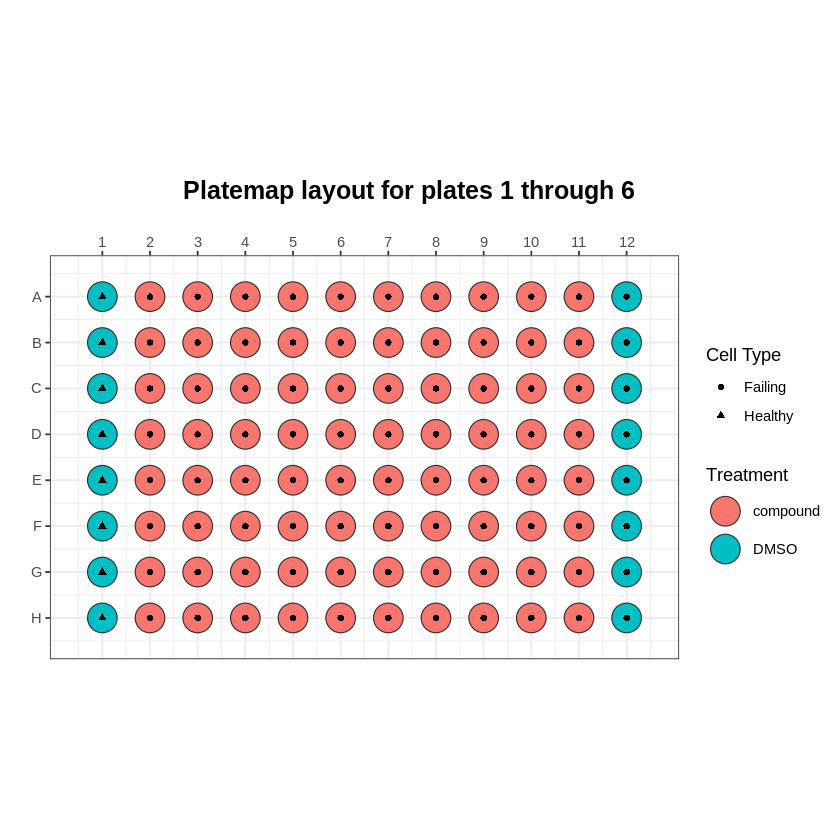

In [5]:
plates_1_6_gg <-
    platetools::raw_map(
        data = platemap_df1$condition, # nolint
        well = platemap_df1$well_position,
        plate = 96,
        size = 8
    ) +
    ggtitle("Platemap layout for plates 1 through 6") +
    theme(plot.title = element_text(hjust = 0.75, size = 15, face = "bold")) +
    ggplot2::geom_point(aes(shape = platemap_df1$cell_type)) +
    ggplot2::scale_shape_discrete(name = "Cell Type") +
    ggplot2::scale_fill_discrete(name = "Treatment")

ggsave(
    output_fig1_6,
    plates_1_6_gg,
    dpi = 500,
    height = 3.5,
    width = 6
)

plates_1_6_gg

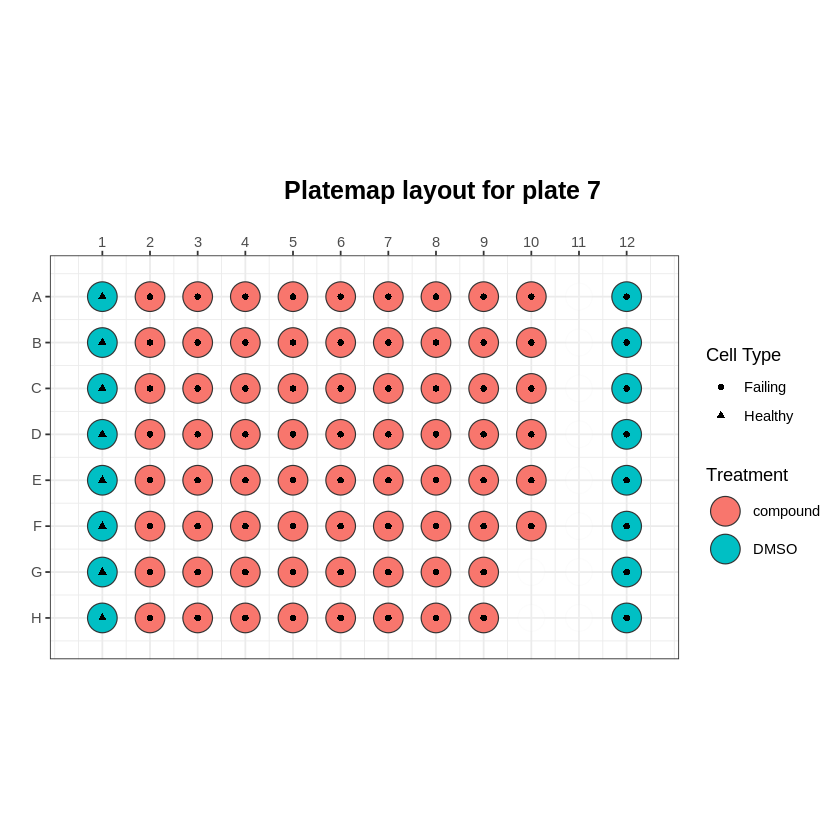

In [6]:
plates_7_gg <-
    platetools::raw_map(
        data = platemap_df7$condition, # nolint
        well = platemap_df7$well_position,
        plate = 96,
        size = 8
    ) +
    ggtitle("Platemap layout for plate 7") +
    theme(plot.title = element_text(hjust = 0.75, size = 15, face = "bold")) +
    ggplot2::geom_point(aes(shape = platemap_df7$cell_type)) +
    ggplot2::scale_shape_discrete(name = "Cell Type") +
    ggplot2::scale_fill_discrete(name = "Treatment")

ggsave(
    output_fig7,
    plates_7_gg,
    dpi = 500,
    height = 3.5,
    width = 6
)

plates_7_gg